# Extracting Text from Norway Traffic-Sign Image

## *Import Libraries*

In [ ]:
# installing keras-ocr
!pip install keras-ocr -q

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 16.4 MB/s eta 0:00:00


In [ ]:
import easyocr
import keras_ocr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from glob import glob
from PIL import Image
from tqdm.notebook import tqdm

plt.style.use('ggplot')

## *Dataset Observasion*

In [ ]:
test_imgs = glob('/content/drive/MyDrive/Image/hello 2.jpg')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Plot Example Images on Test Imgs

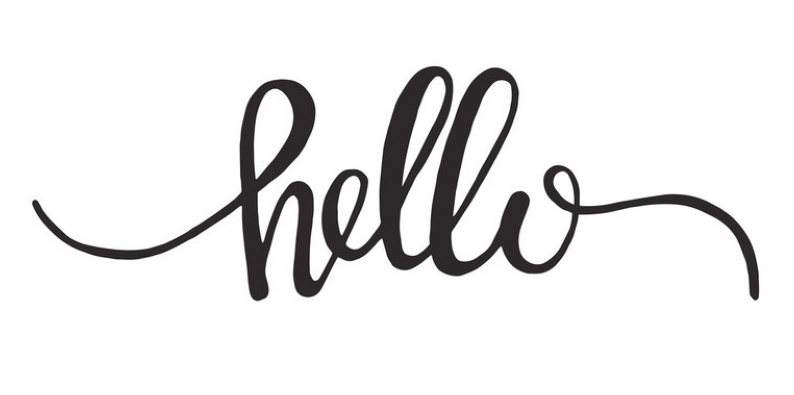

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(plt.imread(test_imgs[0]))
ax.axis('off')
plt.show()

### Display All Test Images

## *Extracting Text from Images*

### Method 1 - EASYOCR

In [ ]:
# initiate reader
reader = easyocr.Reader(['en', 'no'], gpu = True)

# reading text
img = test_imgs[0]
res = reader.readtext(img)

pd.DataFrame(res, columns=['bbox', 'text', 'conf'])

,bbox,text,conf
0,"[[20, 22], [697, 22], [697, 301], [20, 301]]",~Bello ~,0.147501


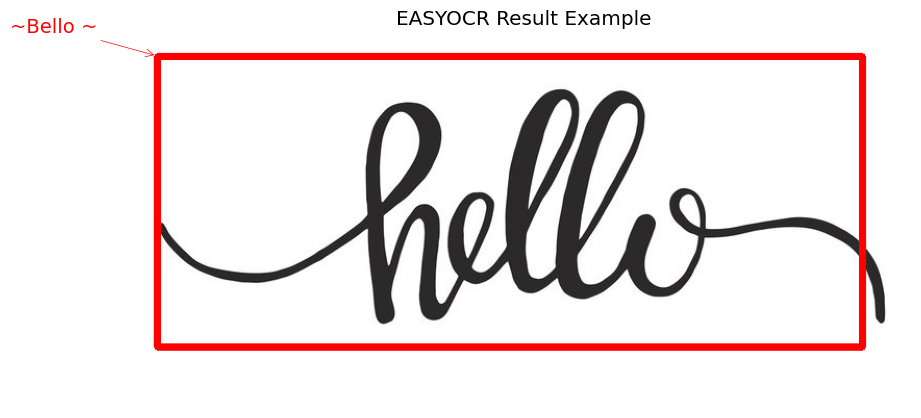

In [ ]:
# Plot image and its annotations
fig, ax = plt.subplots(figsize = (10, 10))
res = pd.DataFrame(res, columns=['bbox', 'text', 'conf'])[['text','bbox']].values.tolist()
res = [(x[0], np.array(x[1])) for x in res]
keras_ocr.tools.drawAnnotations(plt.imread(img), res, ax=ax)
ax.set_title('EASYOCR Result Example')
plt.show()


### Method 2 - KERAS-OCR

In [ ]:
# initiate reader
pipeline = keras_ocr.pipeline.Pipeline()

# reading text
res = pipeline.recognize([test_imgs[0]])

pd.DataFrame(res[0], columns = ['text', 'bbox'])

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step


,text,bbox
0,holds,"[[185.18655, 81.905785], [606.99164, 32.18728]..."


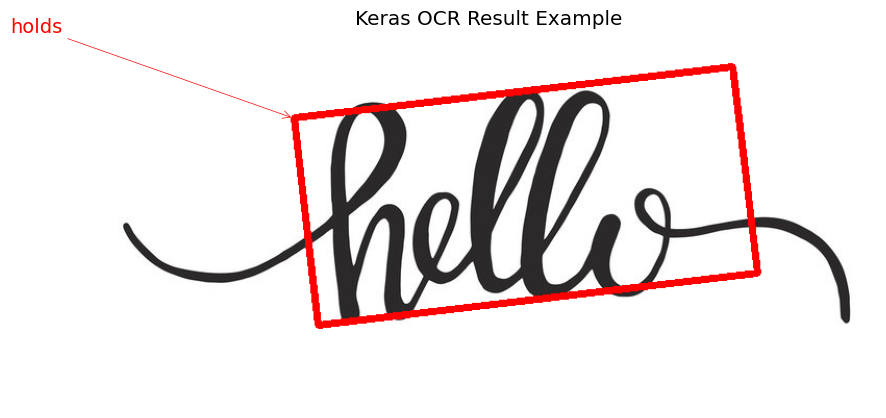

In [ ]:
# Plot image and its annotations
fig, ax = plt.subplots(figsize = (10, 10))
keras_ocr.tools.drawAnnotations(plt.imread(test_imgs[0]), res[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

## *Model Comparison*

### Plot Results : easyocr vs keras_ocr

In [ ]:
def plot_comparison(img, reader_easy, reader_keras):
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))

    # easyocr
    # reading img
    easy_res = reader_easy.readtext(img)
    easy_res = pd.DataFrame(easy_res, columns=['bbox', 'text', 'conf'])[['text','bbox']].values.tolist()
    easy_res = [(x[0], np.array(x[1])) for x in easy_res]
    keras_ocr.tools.drawAnnotations(plt.imread(img), easy_res, ax=axs[0])
    axs[0].set_title('easyocr results', fontsize=24)

    # keras-ocr
    # reading img
    keras_res = reader_keras.recognize([img])
    keras_res = pd.DataFrame(keras_res[0], columns = ['text', 'bbox'])[['text','bbox']].values.tolist()
    keras_ocr.tools.drawAnnotations(plt.imread(img), keras_res, ax=axs[1])
    axs[1].set_title('keras_ocr results', fontsize=24)

    plt.show()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step


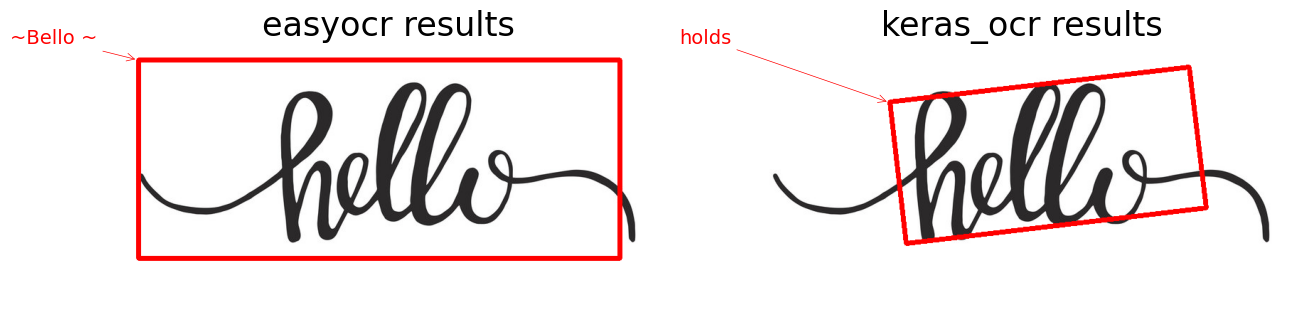

In [ ]:
# initiate easyocr reader
reader_easy = easyocr.Reader(['en', 'no'], gpu = True)

# initiate keras-ocr reader
reader_keras = keras_ocr.pipeline.Pipeline()

# loop over test images
for img in test_imgs:
    plot_comparison(img, reader_easy, reader_keras)
